In [ ]:
import pandas as pd

# ubah file csv menjadi dataframe
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Mall_Customers.csv')

# tampilkan 3 baris pertama
df.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
# ubah nama kalom
df = df.rename(columns={'Gender':'gender',
                        'Age':'age', 
                        'Annual Income (k$)':'annual_income', 
                        'Spending Score (1-100)':'spending_score'})

In [ ]:
df

,CustomerID,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
# ubah data kategorik mmenjadi data numerik
df['gender'].replace(['Female', 'Male'], [0,1], inplace=True)

In [ ]:
df.head()

,CustomerID,gender,age,annual_income,spending_score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [ ]:
# hilangkan kolom CustomerID dan gender
x = df.drop(columns=['CustomerID', 'gender'], axis=1)

In [ ]:
x.head()

,age,annual_income,spending_score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [ ]:
from sklearn.cluster import KMeans

# membuat list yang berisi inertia
clusters = []
for i in range(1, 11):
  km = KMeans(n_clusters=i).fit(x)
  clusters.append(km.inertia_)

In [ ]:
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
clusters

[308812.78,
 212840.16982097185,
 143342.751571706,
 104366.15145556198,
 75479.76429338777,
 58300.44332159069,
 51082.54296792137,
 44312.46881207721,
 40924.484776889774,
 37684.59454489476]

Text(0, 0.5, 'Inertia')

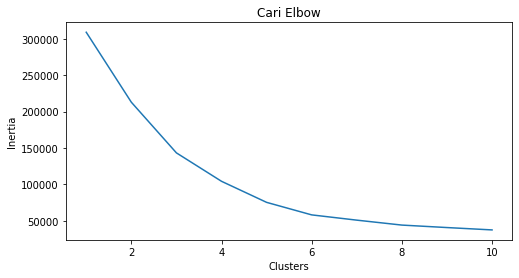

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# membuat plot inertia
fig, ax = plt.subplots(figsize=(8, 4))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Cari Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

In [ ]:
# membuat objek KMeans
km5 = KMeans(n_clusters=5).fit(x)

In [ ]:
km5

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
# menambahkan kolom label pada dataset
x['Labels'] = km5.labels_

In [ ]:
x.head()

,age,annual_income,spending_score,Label,Labels
0,19,15,39,4,4
1,21,15,81,2,2
2,20,16,6,4,4
3,23,16,77,2,2
4,31,17,40,4,4


In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             200 non-null    int64
 1   annual_income   200 non-null    int64
 2   spending_score  200 non-null    int64
 3   Label           200 non-null    int32
 4   Labels          200 non-null    int32
dtypes: int32(2), int64(3)
memory usage: 6.4 KB


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


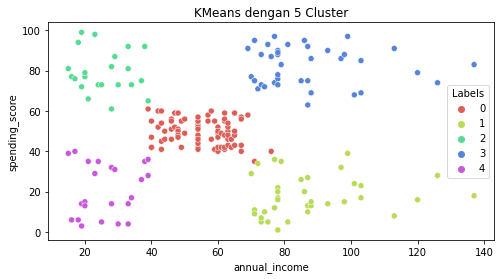

In [ ]:
# membuat plot KMeans dengan 5 klaster
plt.figure(figsize=(8, 4))
sns.scatterplot(x['annual_income'], x['spending_score'], hue=x['Labels'],
                palette=sns.color_palette('hls',5))
plt.title('KMeans dengan 5 Cluster')
plt.show()